<a href="https://colab.research.google.com/github/castudil/air_quality/blob/main/air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import MinMaxScaler # data scaling

# plots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3D

# Data Loading

Load the CSV files from the URL. There are multiple files, one per city. The data contains two columns: date, and PM 2.5 concentrations.

The data corresponds to nine cities in the central valley of Chile. 

In [31]:
path = 'https://raw.githubusercontent.com/castudil/air_quality/main/raw/' # use your path
cities = ['chillan','curico','linares','los_angeles','osorno','puerto_montt','rancagua','san_fernando','talca'];
li = []
for i in cities:
  filename=path+i+'.csv'
  print('loading: '+filename)
  df = pd.read_csv(filename, index_col=None, header=0)
  # Convert the date column to a datestamp type
  df['date'] = pd.to_datetime(df['date'])
  # Set the date column as the index of your DataFrame meat
  df = df.set_index('date')
  ##obtain daily mean vlaues
  df=df.resample('D').mean()
  ##add value indicating the city 
  df['city']=i
  #print(df.head(5))
  li.append(df)

print('consolidating into a single data frame.')
frame = pd.concat(li, axis=0, ignore_index=False)
print('displaying a random sample.')
print(frame.sample(n = 15))
print(frame.describe())
#print(frame['date'].dt.date.min()+ ' to '+ frame['date'].dt.date.max())
print(frame.index.min())
print(frame.index.max())

loading: https://raw.githubusercontent.com/castudil/air_quality/main/raw/chillan.csv
loading: https://raw.githubusercontent.com/castudil/air_quality/main/raw/curico.csv
loading: https://raw.githubusercontent.com/castudil/air_quality/main/raw/linares.csv
loading: https://raw.githubusercontent.com/castudil/air_quality/main/raw/los_angeles.csv
loading: https://raw.githubusercontent.com/castudil/air_quality/main/raw/osorno.csv
loading: https://raw.githubusercontent.com/castudil/air_quality/main/raw/puerto_montt.csv
loading: https://raw.githubusercontent.com/castudil/air_quality/main/raw/rancagua.csv
loading: https://raw.githubusercontent.com/castudil/air_quality/main/raw/san_fernando.csv
loading: https://raw.githubusercontent.com/castudil/air_quality/main/raw/talca.csv
consolidating into a single data frame.
displaying a random sample.
                  PM25          city
date                                
2017-10-22    7.750000  san_fernando
2017-05-10   36.541667  san_fernando
2020-06-

# Data Summary
* The data considers nine different cities.
* The data contains ~14K data rows.
* Daily measurements for four years.
* The exact dates range from 2016-01-01 to 2019-12-31.
* Although some dates with no measures are not included, there is no missing data. 
* Data contains the date of measurement, PM2.5
* concentrations, and city.
* Data ranges from the year 2016 to 2020.

#Charts
Plot the time series for one of the cities.

              PM25
count  1827.000000
mean     24.465902
std      23.142499
min       0.000000
25%       8.958333
50%      14.577249
75%      32.875000
max     155.166667


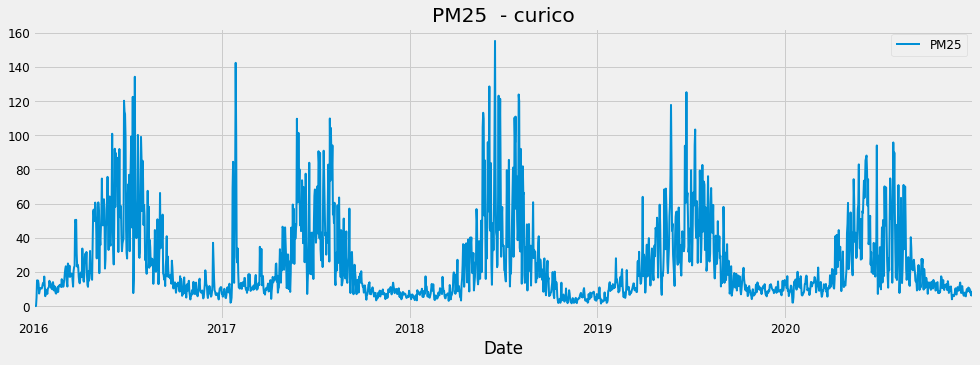

In [27]:
def plot_city(city='curico'):
  plt.rcParams['figure.figsize'] = (15, 5)
  plt.style.use('fivethirtyeight')

  data=frame.loc[frame['city'] == city] # Selecting Data for Curico
  print(data.describe())

  # Plot time series dataset
  ax = data.plot(linewidth=2, fontsize=12);

  # Additional customizations
  ax.set_xlabel('Date');
  ax.set_title('PM25  - ' + city)
  ax.legend(fontsize=12);
  plt.show()

plot_city('curico')

In [36]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

series = read_csv('https://raw.githubusercontent.com/castudil/air_quality/main/raw/curico.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# Set the date column as the index of your DataFrame meat
series = series.set_index('date')

##obtain daily mean vlaues
series=series.resample('D').mean()

##add value indicating the city 
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()
#series['date'] = pd.to_datetime(series['date'])
series.head()


date
2016-01-01 01:00:00    0.0
2016-01-01 02:00:00    0.0
2016-01-01 03:00:00    0.0
2016-01-01 04:00:00    0.0
2016-01-01 05:00:00    0.0
Name: PM25, dtype: float64

#Example: Brief analysis of daily mean PM2.5 concentrations in Curico city

1.   The data shows daily mean PM2.5 concentrations for the city of Curico
1.   The dates range from January 2016 to December 2020.
1.   The data was obtained from hourly data captured by sensor stations and then aggregated.
1.   Most peaks occur in winter; this PM25 saturation obeys a seasonal nature.
1.   An exception occurred in the summer of 2017, perhaps attributed to a fire forest. This information is corroborated by the [newspapers](https://ambiental.net/2017/02/el-incendio-mas-destructivo-en-la-historia-reciente-de-chile/), mentioning that fires as one of the most devasting of the recent years and affecting the center-south of Chile.
1.   We corroborated the situation mentioned above by analyzing the case of 2017 in nearby cities.
We are interested in analyzing the impact of wood stove combustion
1.   Critical measurements occur in the three colder months of the winter season. 
1.   [A previous paper](https://doi.org/10.1049/cp.2019.0243) uses LSTMs and selects only those months of interest. (Also there is a [video](https://www.youtube.com/watch?v=QBOnjVfikTY) explaining that article in Spanish) 
1.   This experiment includes all the data and lets the DL model learn the patterns.











In [29]:
cities

['chillan',
 'curico',
 'linares',
 'los_angeles',
 'osorno',
 'puerto_montt',
 'rancagua',
 'san_fernando',
 'talca']

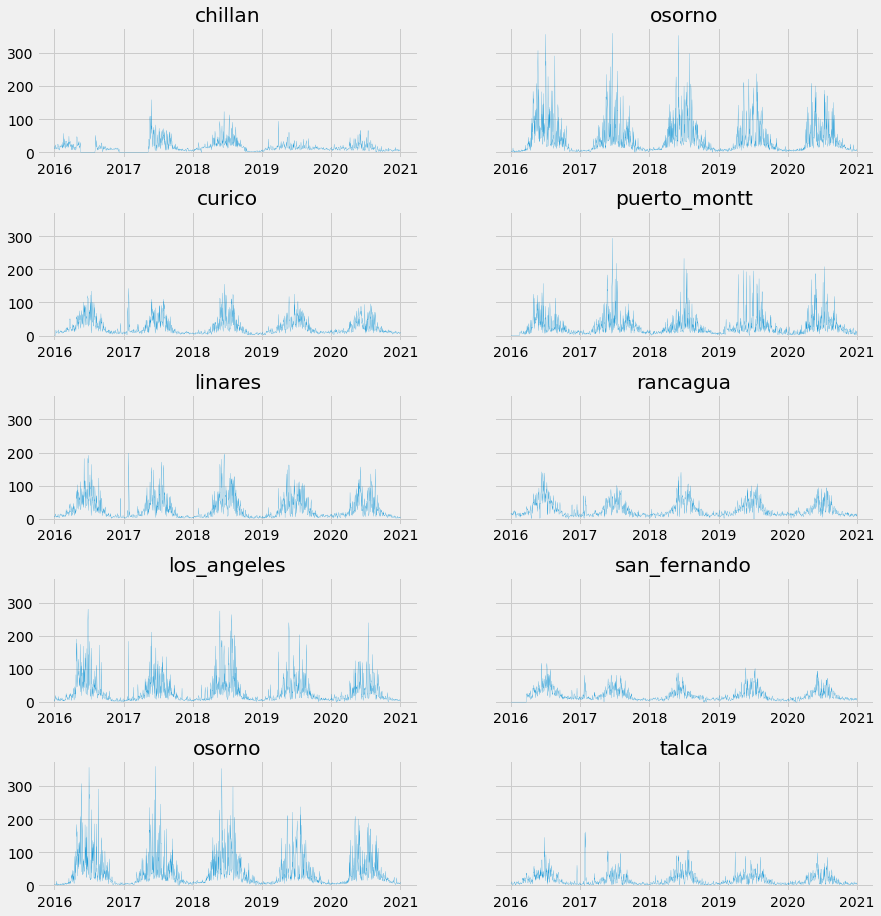

In [28]:
df_columnCity = pd.DataFrame()

# transform cities into columns of the data frame
for city in cities:
  dfCity=frame.loc[frame['city'] == city]
  df_columnCity[city] = dfCity['PM25']#.resample('D').mean()


# initializes the subplots 
figure, axes = plt.subplots(nrows=5,
                            ncols=2,
                            figsize=(15,15),
                            sharex=False,
                            sharey=True)


#cities_graficos =['curico', 'rancagua', 'linares', 'los_angeles', 'san_fernando', 'talca']


# Draw the PM2.5 subplots for the cities. 
for i in range(5):
  axes[i, 0].plot(df_columnCity[cities[i]], linewidth=0.2)
  axes[i, 0].set_title(cities[i])
  #if(i != 4):
  axes[i, 1].plot(df_columnCity[cities[i+4]], linewidth=0.2)
  axes[i, 1].set_title(cities[i+4])


# set adjust of the subplots
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

# show the subplots
plt.show()